## Keras -- MLPs on MNIST

In [1]:
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.layers import Dense, Activation
import seaborn as sns
import numpy as np
import keras

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
numofclasses = 10
y_train = keras.utils.to_categorical(y_train, numofclasses)
y_test = keras.utils.to_categorical(y_test, numofclasses)
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## MODEL 1 WITHOUT BN AND DROPOUT 2 LAYERS :

In [11]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [12]:
model1 = Sequential()
model1.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model1.add(Dense(120, activation='relu', kernel_initializer='random_uniform'))
model1.add(Dense(output_dim, activation='softmax'))
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_2 (Dense)              (None, 120)               43800     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1210      
Total params: 330,750
Trainable params: 330,750
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Training the model
results = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2798 - accuracy: 0.9214 - val_loss: 0.1341 - val_accuracy: 0.9596
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1042 - accuracy: 0.9686 - val_loss: 0.0871 - val_accuracy: 0.9723
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0670 - accuracy: 0.9790 - val_loss: 0.0798 - val_accuracy: 0.9752
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0749 - val_accuracy: 0.9760
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.0765 - val_accuracy: 0.9769
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0701 - val_accuracy: 0.9789
Epoch 7/20
60000/60000 [==============================] - 3s 46us/st

In [15]:
score = model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 72us/step


<IPython.core.display.Javascript object>


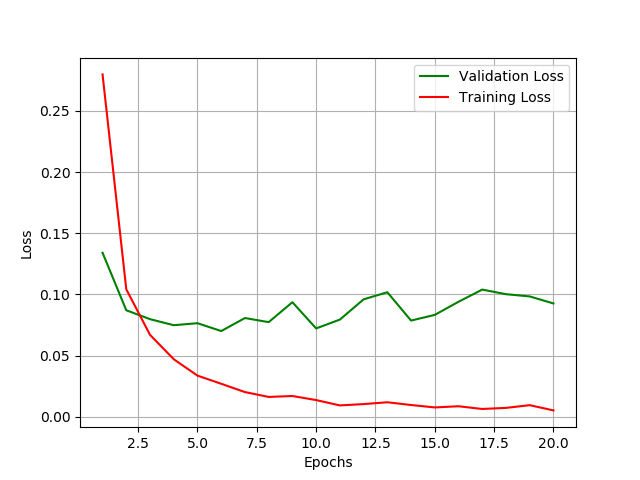

In [16]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [17]:
print('Test accuracy:', score[1])

Test accuracy: 0.9829999804496765


## 2 LAYERS WITH BN AND DROPOUT :

In [18]:
model2 = Sequential()

model2.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model2.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(output_dim, activation='softmax'))
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               46720     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 334,262
Trainable params: 334,006
Non-trainable params: 256
_________________________________________________________________
None


In [19]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
results = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [21]:
score = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/step


<IPython.core.display.Javascript object>


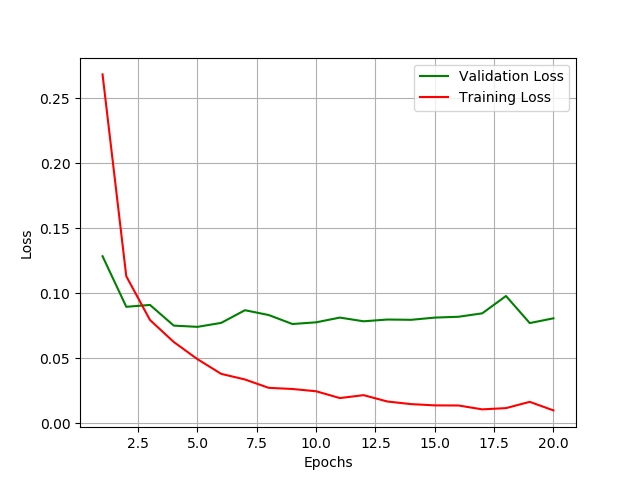

In [22]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [23]:
print('Test accuracy:', score[1])

Test accuracy: 0.9825000166893005


## Changing Dropout to 0.8

In [24]:
model2 = Sequential()
model2.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model2.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.8))
model2.add(Dense(output_dim, activation='softmax'))
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               46720     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 334,262
Trainable params: 334,006
Non-trainable params: 256
_________________________________________________________________
None


In [25]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
results = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.4992 - accuracy: 0.8541 - val_loss: 0.1452 - val_accuracy: 0.9573
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1964 - accuracy: 0.9478 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1378 - accuracy: 0.9629 - val_loss: 0.0976 - val_accuracy: 0.9713
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1093 - accuracy: 0.9704 - val_loss: 0.0900 - val_accuracy: 0.9725
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0933 - accuracy: 0.9739 - val_loss: 0.0865 - val_accuracy: 0.9770
Epoch 6/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0737 - accuracy: 0.9795 - val_loss: 0.0785 - val_accuracy: 0.9791
Epoch 7/20
60000/60000 [==============================] - 3s 56us/st

In [27]:
score = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/step


<IPython.core.display.Javascript object>


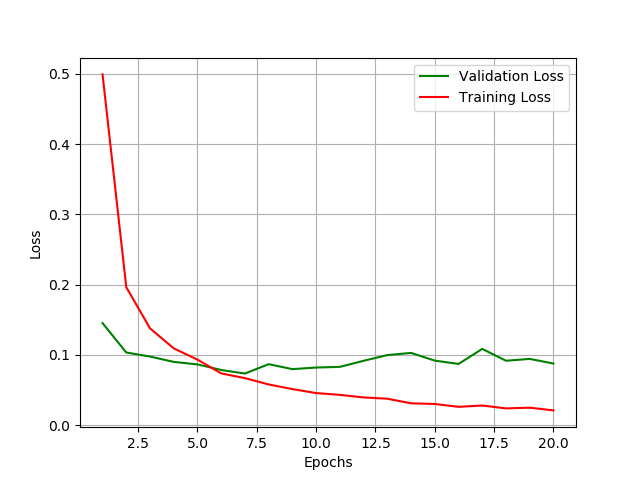

In [28]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [29]:
print('Test accuracy:', score[1])

Test accuracy: 0.9825999736785889


## Changing DropOut Rate To 0.2

In [30]:
model2 = Sequential()
model2.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model2.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(output_dim, activation='softmax'))
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               46720     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 334,262
Trainable params: 334,006
Non-trainable params: 256
_________________________________________________________________
None


In [31]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
results = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2127 - accuracy: 0.9363 - val_loss: 0.1067 - val_accuracy: 0.9690
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0897 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9741
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0780 - val_accuracy: 0.9762
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0446 - accuracy: 0.9855 - val_loss: 0.0775 - val_accuracy: 0.9768
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0817 - val_accuracy: 0.9771
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0872 - val_accuracy: 0.9760
Epoch 7/20
60000/60000 [==============================] - 4s 59us/st

In [33]:
score = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 46us/step


<IPython.core.display.Javascript object>


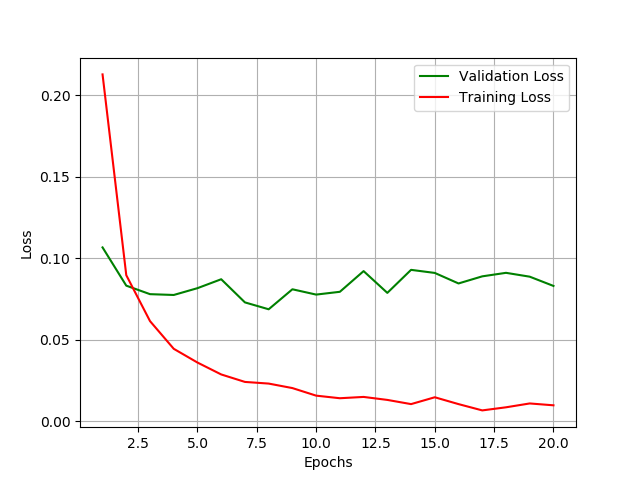

In [34]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [35]:
print('Test accuracy:', score[1])

Test accuracy: 0.9815999865531921


## Model With 3 Hidden Layers :

In [36]:
model3 = Sequential()
model3.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model3.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model3.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model3.add(Dense(output_dim, activation='softmax'))
print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 341,366
Trainable params: 341,366
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
results = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [39]:
score = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 50us/step


<IPython.core.display.Javascript object>


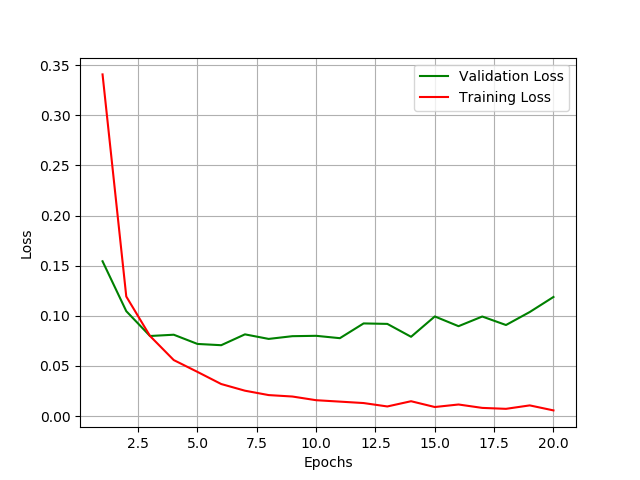

In [40]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')
# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))
train_loss = results.history['loss']
val_loss = results.history['val_loss']
ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [41]:
print('Test accuracy:', score[1])

Test accuracy: 0.9761999845504761


## Model with 3 hidden layers with BN & DropOut :

In [86]:
model3 = Sequential()
model3.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model3.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model3.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(output_dim, activation='softmax'))
print(model3.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_54 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                650       
Total params: 341,622
Trainable params: 341,494
Non-trainable params: 128
_____________________________________________

In [87]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [88]:
results = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [89]:
score = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 54us/step


<IPython.core.display.Javascript object>


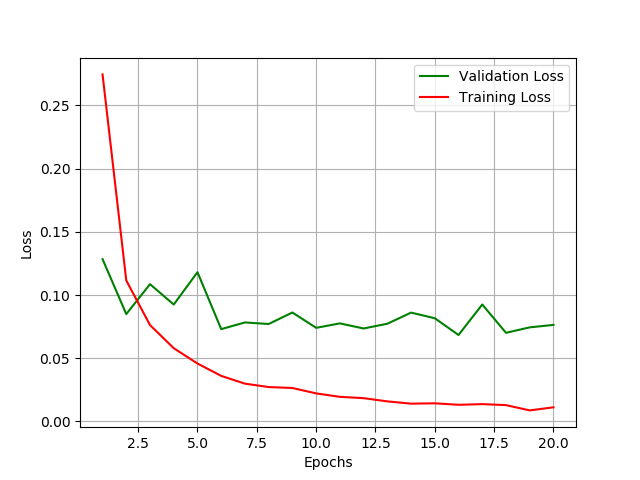

In [90]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')
# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))
train_loss = results.history['loss']
val_loss = results.history['val_loss']
ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [91]:
print('Test accuracy:', score[1])

Test accuracy: 0.9818000197410583


## DropOut with 0.8

In [92]:
model4 = Sequential()
model4.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model4.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model4.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.8))
model4.add(Dense(output_dim, activation='softmax'))
print(model4.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_58 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                650       
Total params: 341,622
Trainable params: 341,494
Non-trainable params: 128
_____________________________________________

In [93]:
model4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
results = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.5065 - accuracy: 0.8498 - val_loss: 0.1633 - val_accuracy: 0.9533
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2083 - accuracy: 0.9464 - val_loss: 0.1047 - val_accuracy: 0.9675
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1507 - accuracy: 0.9619 - val_loss: 0.1190 - val_accuracy: 0.9679
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1111 - accuracy: 0.9704 - val_loss: 0.0968 - val_accuracy: 0.9742
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0969 - accuracy: 0.9743 - val_loss: 0.1000 - val_accuracy: 0.9737
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0843 - accuracy: 0.9776 - val_loss: 0.1257 - val_accuracy: 0.9717
Epoch 7/20
60000/60000 [==============================] - 4s 65us/st

In [95]:
score = model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 56us/step


<IPython.core.display.Javascript object>


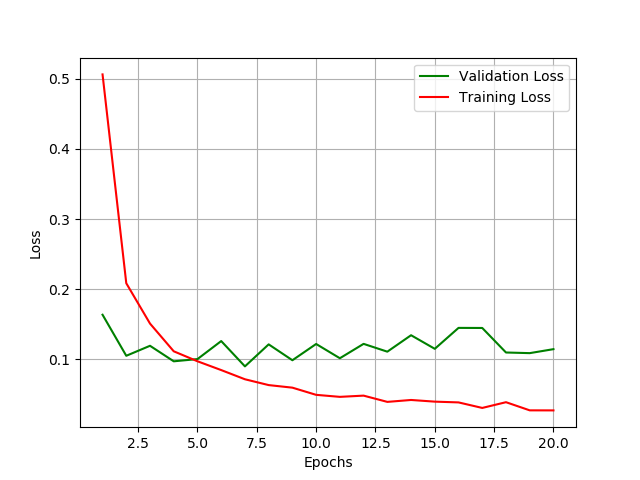

In [96]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [97]:
print('Test accuracy:', score[1])

Test accuracy: 0.9812999963760376


## changing dropout rate to 0.2

In [55]:
model4 = Sequential()
model4.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model4.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model4.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(output_dim, activation='softmax'))
print(model4.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 341,622
Trainable params: 341,494
Non-trainable params: 128
______________________________________________

In [56]:
model4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
results = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2278 - accuracy: 0.9344 - val_loss: 0.1169 - val_accuracy: 0.9688
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.1046 - val_accuracy: 0.9671
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.1284 - val_accuracy: 0.9610
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0777 - val_accuracy: 0.9768
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0695 - val_accuracy: 0.9808
Epoch 7/20
60000/60000 [==============================] - 4s 61us/st

In [58]:
score = model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


<IPython.core.display.Javascript object>


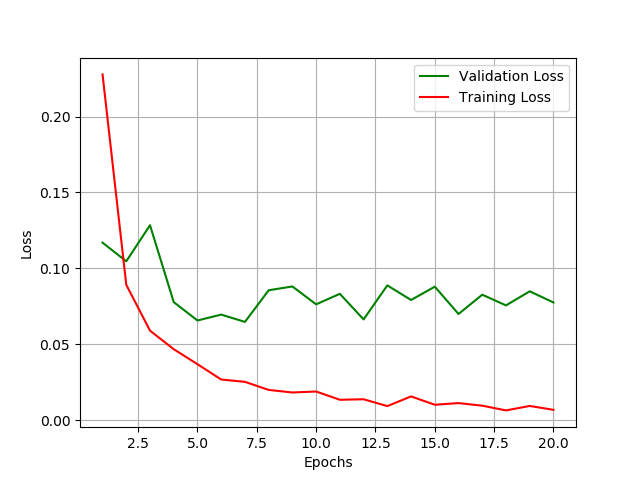

In [59]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')
list_of_epoch = list(range(1,nb_epoch+1))
train_loss = results.history['loss']
val_loss = results.history['val_loss']
ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [60]:
print('Test accuracy:', score[1])

Test accuracy: 0.9837999939918518


## Model with 5 hidden layers :

In [61]:
model5 = Sequential()
model5.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model5.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model5.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model5.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model5.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))
model5.add(Dense(output_dim, activation='softmax'))
print(model5.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_31 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                330       
Total params: 353,462
Trainable params: 353,462
Non-trainable params: 0
________________________________________________

In [62]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
results = model5.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [64]:
score = model5.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 63us/step


<IPython.core.display.Javascript object>


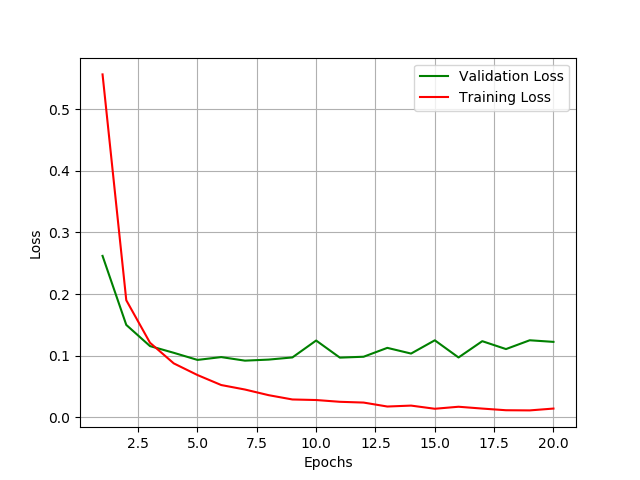

In [65]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [66]:
print('Test accuracy:', score[1])

Test accuracy: 0.9768999814987183


## Model With 5 hidden layers along with BN and Dropout

In [67]:
model6 = Sequential()
model6.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model6.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model6.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(output_dim, activation='softmax'))
print(model6.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_36 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_37 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_38 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)              

In [68]:
model6.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
results = model6.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [70]:
score = model6.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 56us/step


<IPython.core.display.Javascript object>


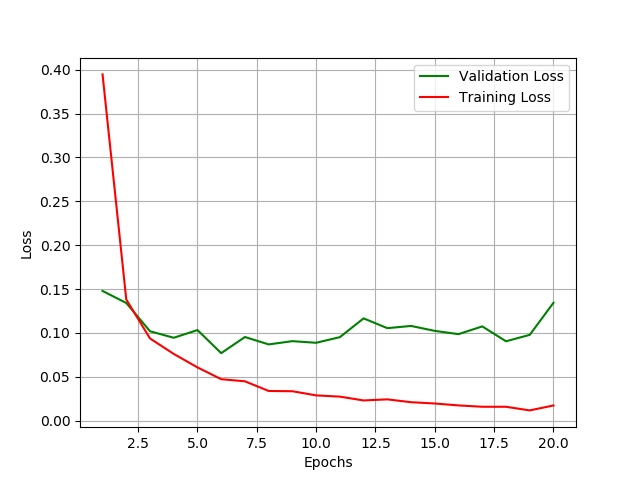

In [71]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [72]:
print('Test accuracy:', score[1])

Test accuracy: 0.9768000245094299


## Dropout to 0.8

In [73]:
model6 = Sequential()
model6.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model6.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model6.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.8))
model6.add(Dense(output_dim, activation='softmax'))
print(model6.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_43 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32)                128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)              

In [74]:
model6.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
results = model6.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.8172 - accuracy: 0.7139 - val_loss: 0.2154 - val_accuracy: 0.9497
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.4396 - accuracy: 0.8383 - val_loss: 0.1347 - val_accuracy: 0.9660
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.3578 - accuracy: 0.8597 - val_loss: 0.1160 - val_accuracy: 0.9722
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.3197 - accuracy: 0.8700 - val_loss: 0.0984 - val_accuracy: 0.9756
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.3013 - accuracy: 0.8733 - val_loss: 0.0975 - val_accuracy: 0.9775
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2850 - accuracy: 0.8792 - val_loss: 0.1093 - val_accuracy: 0.9766
Epoch 7/20
60000/60000 [==============================] - 4s 63us/st

In [76]:
score = model6.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 56us/step


<IPython.core.display.Javascript object>


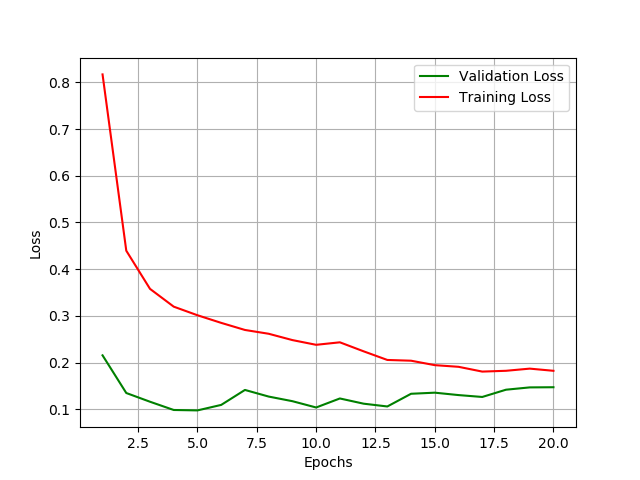

In [77]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [78]:
print('Test accuracy:', score[1])

Test accuracy: 0.9811000227928162


## DropOut to 0.2

In [79]:
model6 = Sequential()
model6.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model6.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model6.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Dense(output_dim, activation='softmax'))
print(model6.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_49 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_50 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32)                128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)              

In [80]:
model6.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
results = model6.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.3328 - accuracy: 0.9092 - val_loss: 0.1275 - val_accuracy: 0.9672
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1045 - accuracy: 0.9708 - val_loss: 0.0985 - val_accuracy: 0.9708
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0696 - accuracy: 0.9801 - val_loss: 0.1003 - val_accuracy: 0.9707
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0529 - accuracy: 0.9850 - val_loss: 0.0821 - val_accuracy: 0.9755
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0427 - accuracy: 0.9882 - val_loss: 0.0860 - val_accuracy: 0.9768
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0892 - val_accuracy: 0.9767
Epoch 7/20
60000/60000 [==============================] - 4s 63us/st

In [82]:
score = model6.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


<IPython.core.display.Javascript object>


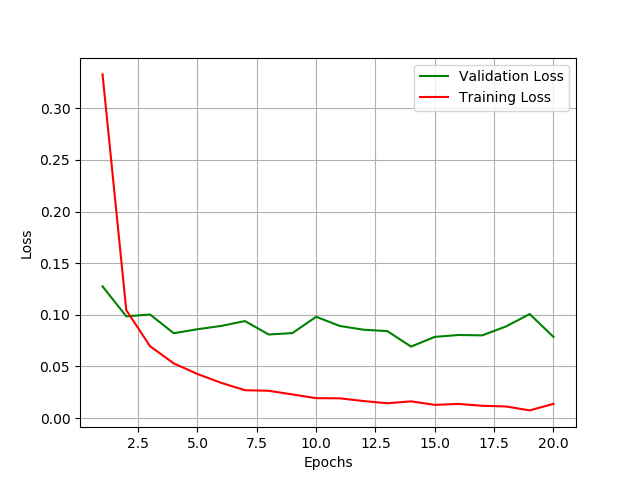

In [83]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = results.history['loss']
val_loss = results.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [84]:
print('Test accuracy:', score[1])

Test accuracy: 0.9825999736785889


## Conclusions 

In [85]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Numer of Layers", "BN","Dropout", "Accuracy"]
x.add_row(["2", 'NO',"NO", 0.981])
x.add_row(["2", 'YES',0.5, 0.982])
x.add_row(["2", 'YES',0.8, 0.982])
x.add_row(["2", 'YES',0.2, 0.981])
x.add_row(["3", 'NO',"NO", 0.971])
x.add_row(["3", 'YES',0.5, 0.976])
x.add_row(["3", 'YES',0.8, 0.980])
x.add_row(["3", 'YES',0.2, 0.983])
x.add_row(["5", 'NO','NO', 0.976])
x.add_row(["5", 'YES',0.5, 0.976])
x.add_row(["5", 'YES',0.8, 0.981])
x.add_row(["5", 'YES',0.2, 0.982])
print(x)

+-----------------+-----+---------+----------+
| Numer of Layers |  BN | Dropout | Accuracy |
+-----------------+-----+---------+----------+
|        2        |  NO |    NO   |  0.981   |
|        2        | YES |   0.5   |  0.982   |
|        2        | YES |   0.8   |  0.982   |
|        2        | YES |   0.2   |  0.981   |
|        3        |  NO |    NO   |  0.971   |
|        3        | YES |   0.5   |  0.976   |
|        3        | YES |   0.8   |   0.98   |
|        3        | YES |   0.2   |  0.983   |
|        5        |  NO |    NO   |  0.976   |
|        5        | YES |   0.5   |  0.976   |
|        5        | YES |   0.8   |  0.981   |
|        5        | YES |   0.2   |  0.982   |
+-----------------+-----+---------+----------+
